In [3]:
!pip install googletrans
!pip install langdetect
!pip install pycountry
!pip install imblearn

   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ------------------- -------------------- 112.6/235.6 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 3.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)},style='darkgrid')
from time import time
import re
import string
import nltk
from googletrans import Translator
from langdetect import detect
import pycountry
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [20]:
train = pd.read_csv(r"C:\\Users\\swast\\OneDrive\\Desktop\\codesoft intern\\archive\\Genre Classification Dataset\\train_data.txt",
                    sep=':::',names=['Title', 'Genre', 'Description']).reset_index(drop=True)
train.head()

C:\Users\swast\AppData\Local\Temp\ipykernel_6204\56280433.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv(r"C:\\Users\\swast\\OneDrive\\Desktop\\codesoft intern\\archive\\Genre Classification Dataset\\train_data.txt",


,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [21]:
test = pd.read_csv(r"C:\\Users\\swast\\OneDrive\\Desktop\\codesoft intern\\archive\\Genre Classification Dataset\\test_data.txt",
                  sep=':::',names=['Title', 'Description']).reset_index(drop=True)
test.head()

C:\Users\swast\AppData\Local\Temp\ipykernel_6204\2420532066.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv(r"C:\\Users\\swast\\OneDrive\\Desktop\\codesoft intern\\archive\\Genre Classification Dataset\\test_data.txt",


,Title,Description
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...


In [12]:
train.describe(include='object').T
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
 3   Language     54214 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [13]:
train.duplicated().sum()
train.Genre.unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [14]:
test.describe(include='object').T
test.info()
test.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 847.0+ KB


0

In [22]:
train.loc[train['Description'].str.contains(r'@\S+')].head()

,Title,Genre,Description
242,Túlvilági beszélö (1992),documentary,Mail <svaradi@sprynet.com> for translation. T...
1880,Rokonok (1954),drama,Mail <svaradi@sprynet.com> for translation. F...
1986,Lila akác (1934),comedy,Mail <svaradi@sprynet.com> for translation. S...
6579,A csúnya lány (1935),comedy,Mail <svaradi@sprynet.com> for translation. D...
8296,Füszer és csemege (1940),drama,Mail <svaradi@sprynet.com> for translation. 5...


In [23]:
def detect_language(text):
    try:
        #Returning the name 'English instide of en'
        return pycountry.languages.get(alpha_2=detect(text)).name.lower()
    except:
        return 'Unknown'
train['Language'] = train['Description'].apply(detect_language)
test['Language'] = test['Description'].apply(detect_language)
train.head()

,Title,Genre,Description,Language
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,Unknown
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,Unknown
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,Unknown
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,Unknown
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,Unknown


C:\Users\swast\AppData\Local\Temp\ipykernel_6204\435801948.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


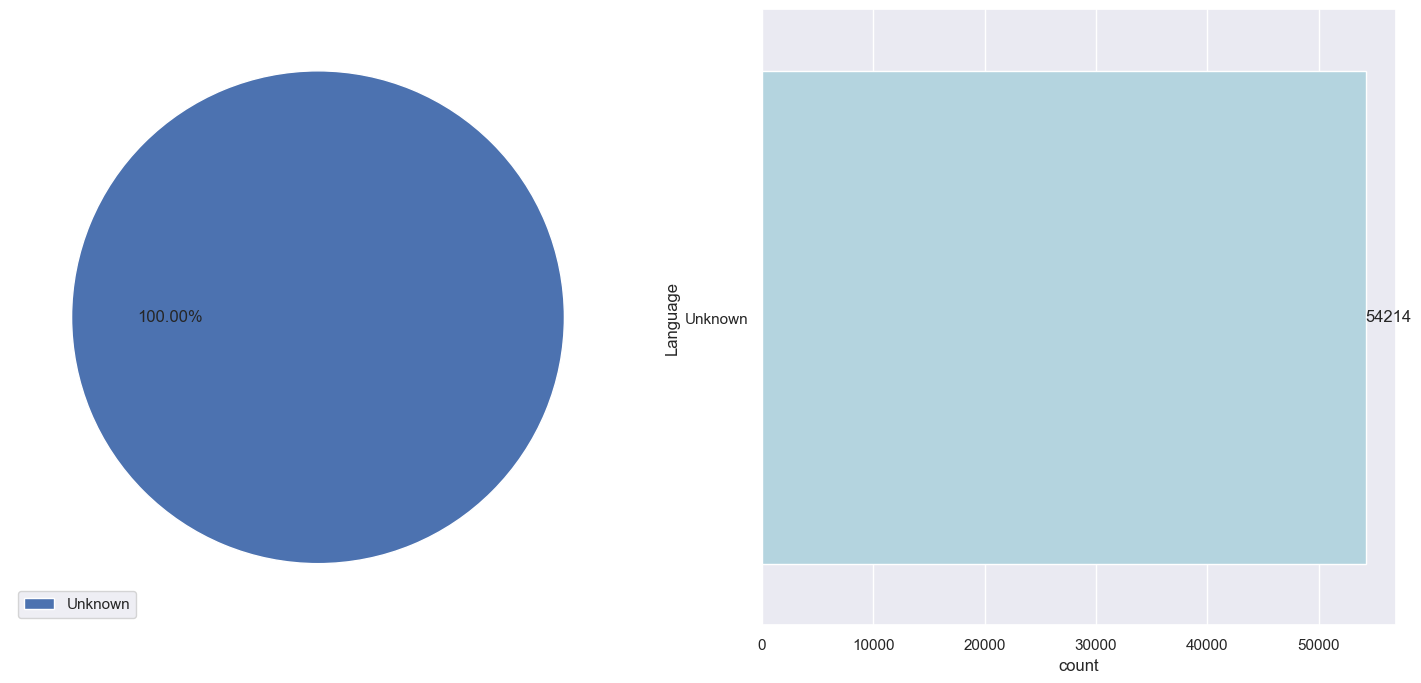

In [24]:
fig,axs = plt.subplots(1,2)
axs[0].pie(train.Language.value_counts().values.tolist(),autopct='%.2f%%')
axs[0].legend(labels=train.Language.value_counts().index.tolist(),loc='lower left')
sns.countplot(data=train,y='Language',order=train.Language.value_counts().index.tolist(),ax=axs[1],color='lightblue')
axs[1].bar_label(axs[1].containers[0])
fig.show()

In [25]:
train.loc[train['Description'].str.contains(r'http\S+')].shape[0]

9

In [26]:
train.loc[train['Description'].str.contains(r'http\S+')].head()['Description'].iloc[1]

" There's more to the story of the Clintons and 9/11. Over two nights -- September 10-11, 2006, just four months before Hillary announced the exploratory committee for her original presidential campaign, ABC aired The Path to 9/11, a riveting and factual docudrama. This acclaimed and balanced movie faulted two administrations -- Bill Clinton and George W. Bush. But fairness was not what Hillary wanted. Screenwriter Cyrus Nowrasteh told me he had expected the customary DVD distribution. But the Clintons, fearing the impact of DVD release during her campaign, successfully pressured Disney, which owns ABC, to bury the movie. This is a portion of a news article that originally appeared: http://www.frontpagemag.com/fpm/261541/hillarys-path-back-911-arnold-steinberg This article originally appeared in The Huffington Post http://www.huffingtonpost.com/arnold-steinberg/hillarys-path-back-to-911_b_9039658.html This article was written by Arnold Steinberg from Huffington Post and was legally lic

In [27]:
def clean_text(text):
    # Remove strange pattern in different languages if exist 
    text = re.sub('Mail <svaradi@sprynet.com> for translation. ','',text)
    # Remove twitter handles
    text = re.sub(r'@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuations
    text = re.sub(f'[{string.punctuation}]','',text)
    # Remove numbers
    text = re.sub(f'[{string.digits}]','',text)
    # Remove single charachters 
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    return text

In [28]:
train['Description'] = train['Description'].apply(clean_text)
test['Description'] = test['Description'].apply(clean_text)

In [29]:
train[~train.Language.isin(['english'])]

,Title,Genre,Description,Language
0,Oscar et la dame rose (2009),drama,Listening in to conversation between his doct...,Unknown
1,Cupid (1997),thriller,brother and sister with past incestuous relat...,Unknown
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,Unknown
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,Unknown
4,The Unrecovered (2007),drama,The films title refers not only to the unreco...,Unknown
...,...,...,...,...
54209,"""Bonino"" (1953)",comedy,This shortlived NBC live sitcom centered on B...,Unknown
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION The siste...,Unknown
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,Ze bestaan echt is standup comedy about growi...,Unknown
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,Unknown


In [30]:
#Translate other languages
def trans(text):
    try:
        return Translator().translate(text,dest='en').text
    except:
        return text
train.loc[~train['Language'].isin(['english']), 'Description']=train.loc[~train['Language'].isin(['english']),'Description'].apply(trans)
test.loc[~test['Language'].isin(['english']), 'Description']=test.loc[~test['Language'].isin(['english']),'Description'].apply(trans)

In [ ]:
train.drop(columns='Language',inplace=True)
test.drop(columns='Language',inplace=True)

In [ ]:
#Distribution of text lengths
train['Dest_len'] = train['Description'].apply(len)
sns.distplot(train['Dest_len'])
plt.title('Distribution of lengths',fontweight='bold',fontsize=20)
plt.show()

In [ ]:
ax=sns.countplot(data=train,x='Genre',order=train.Genre.value_counts().index,palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Genres Distribution',fontweight='bold',fontsize=16)
plt.xticks(rotation=45,fontweight='bold',fontsize=10)
plt.show()

In [ ]:
# Using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True, #Lowercase chars
                                   ngram_range=(1,1), #Capture only single words in each text(unigrams)
                                   stop_words='english',#Remove stop_words
                                   min_df=2)#Ignore words that appears less than 2 times
x_train = tfidf_vectorizer.fit_transform(train['Description'])
x_test = tfidf_vectorizer.transform(test['Description'])


In [ ]:
sampler = RandomOverSampler()
#We will pass to it the output of TfidfVectorizer from train data
x_train_resampled , y_train_resampled = sampler.fit_resample(x_train,train['Genre'])

In [ ]:
sns.countplot(data=y_train_resampled,x=y_train_resampled.values,palette='rocket')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print('Train :',x_train_resampled.shape[0])
print('Test :',y_train_resampled.shape[0])

In [ ]:
y_actual = pd.read_csv(r"C:\Users\swast\OneDrive\Desktop\codesoft intern\archive\Genre Classification Dataset\test_data_solution.txt",
                      sep=':::',usecols=[2],header=None).rename(columns={2:'Actual_Genre'})
y_actual.head()

C:\Users\swast\AppData\Local\Temp\ipykernel_7272\4292677069.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  y_actual = pd.read_csv(r"C:\Users\swast\OneDrive\Desktop\codesoft intern\archive\Genre Classification Dataset\test_data_solution.txt",


,Actual_Genre
0,thriller
1,comedy
2,documentary
3,drama
4,drama


In [ ]:
NB = MultinomialNB(alpha=0.3)
start_time = time()
NB.fit(x_train_resampled,y_train_resampled)
y_pred = NB.predict(x_test)
print('Accuracy :',accuracy_score(y_actual,y_pred))
end_time = time()
print('Running Time : ',round(end_time - start_time,2),'Secounds')

In [ ]:
print(classification_report(y_actual,y_pred))
cm =confusion_matrix(y_actual,y_pred,labels=NB.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=NB.classes_)
cmd.plot(cmap=plt.cm.Reds,xticks_rotation='vertical',text_kw={'size': 8})
plt.show()

In [ ]:
pd.concat([pd.concat([test,y_actual],axis=1),pd.Series(y_pred)],axis=1).rename(columns={0:'Predicted_Genre'}).head(10)

In [ ]:
y_train_modified = train['Genre'].apply(lambda genre: genre if genre.strip() in ['drama','documentary'] else 'other')
y_actual_modified = y_actual['Actual_Genre'].apply(lambda genre: genre if genre.strip() in ['drama','documentary'] else 'other')

In [ ]:
NB = MultinomialNB(alpha=0.3)
start_time = time()
NB.fit(x_train,y_train_modified)
y_pred = NB.predict(x_test)
print('Accuracy :',accuracy_score(y_actual_modified,y_pred))
end_time = time()
print('Running Time : ',round(end_time - start_time,2),'Secounds')